# ML Classification Algorithm for Hate Speech Detection

*Creating a Basic Classification Algorithm that can be trained on a dataset of tweets labeled as hate speech, offensive, or neither, and can predict the class of a new tweet.*

### Reading Dataset from file

In [1]:
import pandas as pd

labeled_hate_speech= pd.read_csv("labeled_data.csv")

### Exploratory Data Analysis

In [2]:
#Columns of Dataset
labeled_hate_speech.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [3]:
# Obtaining summary of dataset
print(labeled_hate_speech.describe())

         Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class  
count  24783.000000  24783.000000  
mean       0.549247      1.110277  
std        1.113299      0.462089  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.000000  
75%        0.000000      1.000000  
max        9.000000      2.000000  


In [4]:
# Checking values of each column
labeled_hate_speech.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
#Only the last two columns, class & tweet, are required for classification

labeled_hate_speech[['class','tweet']]

labeled_hate_speech.drop(['hate_speech','count','offensive_language','neither'],axis=1,inplace=True)

print(labeled_hate_speech)

       Unnamed: 0  class                                              tweet
0               0      2  !!! RT @mayasolovely: As a woman you shouldn't...
1               1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2               2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3               3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4               4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...           ...    ...                                                ...
24778       25291      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779       25292      2  you've gone and broke the wrong heart baby, an...
24780       25294      1  young buck wanna eat!!.. dat nigguh like I ain...
24781       25295      1              youu got wild bitches tellin you lies
24782       25296      2  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[24783 rows x 3 columns]


#### Analysing Dataset for Classification

[2 1 0]


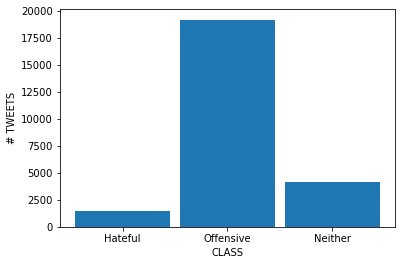

In [6]:
#Analysing the Distribution of the Dataset

print(labeled_hate_speech['class'].unique())

from matplotlib import pyplot as plt

fig,ax=plt.subplots(1,1)
ax.hist(labeled_hate_speech['class'],bins=[0,1,2,3],rwidth=0.9)
ax.set_xlabel('CLASS')
ax.set_xticks((0.5,1.5,2.5))
ax.set_xticklabels(('Hateful','Offensive','Neither'))
ax.set_ylabel('# TWEETS')

plt.savefig('histogram.jpg')

### Data Pre-Processing

#### Cleaning the Tweets using Spacy

In [7]:
import spacy
#Loading English pipeline
nlp = spacy.load("en_core_web_sm")

#Function to remove stopwords, punctuation and blank spaces and convert all text to lowercase 
def text_pipeline_spacy(text):
    token_string=""
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    for t in tokens:
      token_string = " ".join([token_string, str(t)])
    return token_string


text_pipeline_spacy("This is a test sentence. This is the second sentence. Now we have 2 sentences")

' test sentence second sentence 2 sentence'

In [8]:

#Testing pipeling with one tweet
print(labeled_hate_speech['tweet'][0])
print(text_pipeline_spacy(labeled_hate_speech['tweet'][0]))

cleaned_tweet=[]

# Implementing the text pre-processing pipeline to entire dataset
from tqdm import tqdm
for tweet in tqdm(labeled_hate_speech['tweet']):
  cleaned_tweet.append(text_pipeline_spacy(tweet))

  0%|                                                                              | 11/24783 [00:00<04:06, 100.32it/s]

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
 rt @mayasolovely woman complain clean house amp man trash


100%|███████████████████████████████████████████████████████████████████████████| 24783/24783 [02:04<00:00, 198.57it/s]


In [9]:
# Adding Cleaned tweets to dataframe
labeled_hate_speech['cleaned_tweet'] = cleaned_tweet


In [10]:
#Displaying results of data pre-processing 

for i in range(3):
  print("Original Tweet:  " + labeled_hate_speech['tweet'][i+10])
  
  print("Pre-Processed Tweet:  "+ labeled_hate_speech['cleaned_tweet'][i+10]+"\n\n")



Original Tweet:  " Keeks is a bitch she curves everyone " lol I walked into a conversation like this. Smh
Pre-Processed Tweet:   keeks bitch curve lol walk conversation like smh


Original Tweet:  " Murda Gang bitch its Gang Land "
Pre-Processed Tweet:   murda gang bitch gang land


Original Tweet:  " So hoes that smoke are losers ? " yea ... go on IG
Pre-Processed Tweet:   hoe smoke loser yea ig




#### Train and Test Split

In [11]:
from sklearn.model_selection import train_test_split
x = labeled_hate_speech['cleaned_tweet']
y = labeled_hate_speech['class']

train_data,test_data,train_labels,test_labels=train_test_split(x,y,test_size=0.15)


print("Training Data %: ", round(train_data.shape[0]/24783*100,2))
print("\nTesting Data  %: ", round(test_data.shape[0]/24783*100,2))


Training Data %:  85.0

Testing Data  %:  15.0


## Classification

### Vectorizing Data

###### One-Hot

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

one_hot_vectorizer = CountVectorizer(stop_words=['rt','want'],max_df=0.7)

train_features = one_hot_vectorizer.fit_transform(train_data)
test_features = one_hot_vectorizer.transform(test_data)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
'''
Parameters used:
    ngram_range: Range of n-values for different n-grams to be extracted
    max_df: Maximum threshold of document frequency
    stop_words: list of stop-words to be disregarded
'''
one_hot_vectorizer = CountVectorizer(stop_words=['rt','want'],ngram_range=(1,5),max_df=0.7)

train_features = one_hot_vectorizer.fit_transform(train_data)
test_features = one_hot_vectorizer.transform(test_data)

###### TF - IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
'''
Parameters used:
    ngram_range: Range of n-values for different n-grams to be extracted
    max_df: Maximum threshold of document frequency
    stop_words: list of stop-words to be disregarded
'''
tfidf_vectorizer = TfidfVectorizer(stop_words=['rt','want'],ngram_range=(1,5),max_df=0.7)

tfidf_train_features = tfidf_vectorizer.fit_transform(train_data)
tfidf_test_features = tfidf_vectorizer.transform(test_data)

In [38]:
# Vocabulary Size (will be similar for both strategies)
print("Vocabulary Size: ",len(one_hot_vectorizer.vocabulary_))


Vocabulary Size:  478778


###  Evaluation Metrics

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

#Creating an Evaluation Metrics Table  for Classifiers

def evaluation_summary(description, true_labels, predictions, target_classes=["0","1","2"]):
  print("\nEvaluation for: " + description)
  print(classification_report(true_labels, predictions,  digits=3, zero_division=0))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions))


### Classification Models

#### Dummy Classifier - Baseline

In [16]:
from sklearn.dummy import DummyClassifier

#Uniform Strategy generates predictions uniformly at random from the list of unique classes observed in train_labels

dummy = DummyClassifier(strategy='uniform')
dummy.fit(train_features, train_labels)

print("\nDummy Classifier(Uniform) : ", dummy.score(test_features, test_labels))
dummy_predicted_labels = dummy.predict(test_features)
evaluation_summary("Dummy Classifier(Uniform)\n", test_labels, dummy_predicted_labels)


Dummy Classifier(Uniform) :  0.3399677245831092

Evaluation for: Dummy Classifier(Uniform)

              precision    recall  f1-score   support

           0      0.061     0.336     0.103       223
           1      0.776     0.334     0.467      2867
           2      0.174     0.344     0.231       628

    accuracy                          0.336      3718
   macro avg      0.337     0.338     0.267      3718
weighted avg      0.631     0.336     0.405      3718


Confusion matrix:
 [[ 75  67  81]
 [962 958 947]
 [202 210 216]]


#### Logistic Regression

##### LR with One-Hot(TF) Vectorization

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'newton-cg')
lr_model = lr.fit(train_features, train_labels)

print("\nLogistic Regression (One-hot vectorization) : ",lr_model.score(test_features,test_labels))
lr_model_predicted_labels_test = lr_model.predict(test_features)
evaluation_summary("Logistic Regression (One-hot vectorization)", test_labels, lr_model_predicted_labels_test)


Logistic Regression (One-hot vectorization) :  0.9058633674018289

Evaluation for: Logistic Regression (One-hot vectorization)
              precision    recall  f1-score   support

           0      0.520     0.229     0.318       223
           1      0.932     0.959     0.945      2867
           2      0.849     0.904     0.876       628

    accuracy                          0.906      3718
   macro avg      0.767     0.697     0.713      3718
weighted avg      0.893     0.906     0.896      3718


Confusion matrix:
 [[  51  144   28]
 [  45 2749   73]
 [   2   58  568]]


##### LR with One-Hot (TF) Vectorization and Class Weights

In [104]:
from sklearn.linear_model import LogisticRegression

class_wt = {0:13.4 ,1:1.0, 2:4.6}

lr = LogisticRegression(solver = 'newton-cg',class_weight=class_wt)
lr_model = lr.fit(train_features, train_labels)

print("\nLogistic Regression (One-hot vectorization) : ",lr_model.score(test_features,test_labels))
lr_model_predicted_labels_test = lr_model.predict(test_features)
evaluation_summary("Logistic Regression (One-hot vectorization)", test_labels, lr_model_predicted_labels_test)



Logistic Regression (One-hot vectorization) :  0.9055944055944056

Evaluation for: Logistic Regression (One-hot vectorization)
              precision    recall  f1-score   support

           0      0.491     0.480     0.485       223
           1      0.957     0.932     0.944      2867
           2      0.832     0.936     0.881       628

    accuracy                          0.906      3718
   macro avg      0.760     0.783     0.770      3718
weighted avg      0.908     0.906     0.906      3718


Confusion matrix:
 [[ 107   87   29]
 [ 105 2672   90]
 [   6   34  588]]


###### LR with TF-IDF Vectorization

In [18]:
lr_tfidf = LogisticRegression()
lr_tfidf_model = lr_tfidf.fit(tfidf_train_features, train_labels)

print("\nLogistic Regression (TF-IDF Vectorization) : ",lr_tfidf_model.score(tfidf_test_features,test_labels))
lr_model_tfidf_predicted_labels_test = lr_tfidf_model.predict(tfidf_test_features)
evaluation_summary("Logistic Regression (TF-IDF Vectorization)", test_labels, lr_model_tfidf_predicted_labels_test)


Logistic Regression (TF-IDF Vectorization) :  0.8803119956966111

Evaluation for: Logistic Regression (TF-IDF Vectorization)
              precision    recall  f1-score   support

           0      0.542     0.233     0.326       223
           1      0.896     0.963     0.928      2867
           2      0.852     0.732     0.788       628

    accuracy                          0.880      3718
   macro avg      0.763     0.643     0.681      3718
weighted avg      0.867     0.880     0.868      3718


Confusion matrix:
 [[  52  153   18]
 [  44 2761   62]
 [   0  168  460]]


#### Support Vector Machines

###### SVC with One-Hot(TF) Vectorization

In [51]:
from sklearn.svm import SVC
svc_default = SVC(kernel = 'rbf')
svc_default_model = svc_default.fit(train_features, train_labels)

print("\nSVC Classifier (One-hot vectorization)) : ",svc_default_model.score(test_features,test_labels))
svc_default_model_predicted_labels = svc_default_model.predict(test_features)
evaluation_summary("SVC Classifier (One-hot vectorization)", test_labels, svc_default_model_predicted_labels)


SVC Classifier (One-hot vectorization)) :  0.9031737493275955

Evaluation for: SVC Classifier (One-hot vectorization)
              precision    recall  f1-score   support

           0      0.500     0.067     0.119       223
           1      0.925     0.964     0.944      2867
           2      0.828     0.922     0.873       628

    accuracy                          0.903      3718
   macro avg      0.751     0.651     0.645      3718
weighted avg      0.883     0.903     0.882      3718


Confusion matrix:
 [[  15  178   30]
 [  13 2764   90]
 [   2   47  579]]


###### SVC with One-Hot(TF) Vectorization and Class Weights

In [44]:
from sklearn.svm import SVC

#Default kernel is rbf,class weights are used to compensate for unbalanced dataset 
class_wt = {0:13.4 ,1:1.0, 2:4.6}
svc = SVC(kernel = 'rbf',class_weight=class_wt)
svc_model = svc.fit(train_features, train_labels)

print("\nSVC Classifier (One-hot vectorization)) : ",svc_model.score(test_features,test_labels))
svc_model_predicted_labels_test = svc_model.predict(test_features)
evaluation_summary("SVC Classifier (One-hot vectorization)", test_labels, svc_model_predicted_labels_test)


SVC Classifier (One-hot vectorization)) :  0.9039806347498656

Evaluation for: SVC Classifier (One-hot vectorization)
              precision    recall  f1-score   support

           0      0.485     0.520     0.502       223
           1      0.960     0.925     0.942      2867
           2      0.828     0.943     0.882       628

    accuracy                          0.904      3718
   macro avg      0.758     0.796     0.775      3718
weighted avg      0.909     0.904     0.906      3718


Confusion matrix:
 [[ 116   80   27]
 [ 118 2653   96]
 [   5   31  592]]


###### SVC with TF-IDF Vectorization

In [20]:
#Default kernel is rbf,class weights are used to compensate for unbalanced dataset 
class_wt = {0:13.4 ,1:1.0, 2:4.6}
svc_tfidf = SVC(kernel = 'rbf',class_weight=class_wt)
svc_model_tfidf = svc_tfidf.fit(tfidf_train_features, train_labels)

print("\nSVC Classifier (One-hot vectorization)) : ",svc_model_tfidf.score(tfidf_test_features,test_labels))
svc_model_tfidf_predicted_labels_test = svc_model_tfidf.predict(test_features)
evaluation_summary("SVC Classifier (One-hot vectorization)", test_labels, svc_model_tfidf_predicted_labels_test)


SVC Classifier (One-hot vectorization)) :  0.8870360408821947

Evaluation for: SVC Classifier (One-hot vectorization)
              precision    recall  f1-score   support

           0      0.500     0.031     0.059       223
           1      0.781     0.996     0.875      2867
           2      0.848     0.062     0.116       628

    accuracy                          0.781      3718
   macro avg      0.710     0.363     0.350      3718
weighted avg      0.775     0.781     0.698      3718


Confusion matrix:
 [[   7  213    3]
 [   7 2856    4]
 [   0  589   39]]


#### Confusion Matrix of SVM

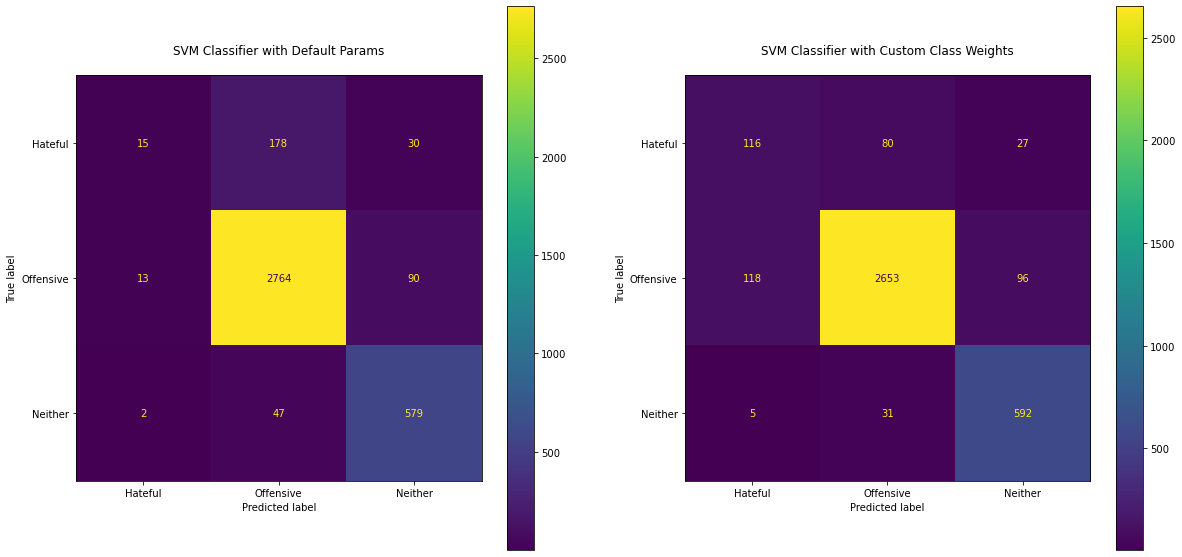

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels,svc_default_model_predicted_labels,labels=svc_default.classes_)
disp = ConfusionMatrixDisplay(
        cm,
        display_labels=svc_default.classes_
    )
fig, ax = plt.subplots(1,2,figsize=(20,10))
disp.plot(ax=ax[0])



cm2 = confusion_matrix(test_labels,svc_model_predicted_labels_test,labels=svc.classes_)
disp2 = ConfusionMatrixDisplay(
        cm2,
        display_labels=svc.classes_
    )
disp2.plot(ax=ax[1])

ax[0].set_xticklabels(('Hateful','Offensive','Neither'))
ax[0].set_yticklabels(('Hateful','Offensive','Neither'))


ax[1].set_xticklabels(('Hateful','Offensive','Neither'))
ax[1].set_yticklabels(('Hateful','Offensive','Neither'))

ax[0].set_title("SVM Classifier with Default Params\n")
ax[1].set_title("SVM Classifier with Custom Class Weights\n")



plt.savefig('ConfusionMatrix.jpg')

#### Confusion Matrix of 2 Best Models

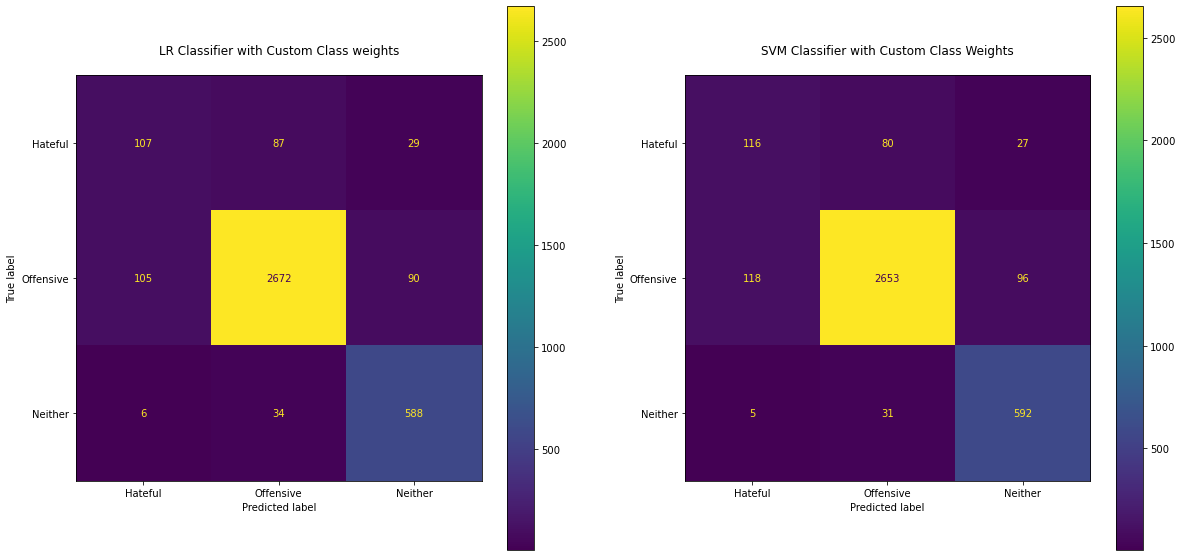

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels,lr_model_predicted_labels_test,labels=lr.classes_)
disp = ConfusionMatrixDisplay(
        cm,
        display_labels=lr.classes_
    )
fig, ax = plt.subplots(1,2,figsize=(20,10))
disp.plot(ax=ax[0])



cm2 = confusion_matrix(test_labels,svc_model_predicted_labels_test,labels=svc.classes_)
disp2 = ConfusionMatrixDisplay(
        cm2,
        display_labels=svc.classes_
    )
disp2.plot(ax=ax[1])

ax[0].set_xticklabels(('Hateful','Offensive','Neither'))
ax[0].set_yticklabels(('Hateful','Offensive','Neither'))


ax[1].set_xticklabels(('Hateful','Offensive','Neither'))
ax[1].set_yticklabels(('Hateful','Offensive','Neither'))

ax[0].set_title("LR Classifier with Custom Class weights\n")
ax[1].set_title("SVM Classifier with Custom Class Weights\n")



plt.savefig('ConfusionMatrix.jpg')

## Feature Engineering

#### VADER

In [101]:
#VADER Implementation. Not used in project.
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vpsqu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [97]:
print("Hateful Tweets: \n")

for i in range(3000):
  test = [test_data.iloc[i]]
  sample_test = one_hot_vectorizer.transform(test)
  test_prediction = svc_model.predict(sample_test)
  test_polarity_score = sid.polarity_scores(test[0])
  if(test_prediction==0 and test_polarity_score['compound']>0.4):
    print("\nTweet: ",test,"\nPredicted Category: ",test_prediction,"\nSentiment: ",test_polarity_score,"\n")

Hateful Tweets: 


Tweet:  [' okay @scubakitteh super dyke weird car sex fetish'] 
Predicted Category:  [0] 
Sentiment:  {'neg': 0.136, 'neu': 0.4, 'pos': 0.464, 'compound': 0.6249} 


Tweet:  [' rt @wwecrowe jerryspringer raw white trash applaud @wwe'] 
Predicted Category:  [0] 
Sentiment:  {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588} 


Tweet:  [' tell dyke look like nigga compliment wonder'] 
Predicted Category:  [0] 
Sentiment:  {'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'compound': 0.6808} 


Tweet:  [' rt @consprcy_carrot blow shit fat white trash love holiday'] 
Predicted Category:  [0] 
Sentiment:  {'neg': 0.218, 'neu': 0.364, 'pos': 0.418, 'compound': 0.5106} 


Tweet:  [' european taste test america white trash snack @sohostyle http://t.co/tn2m01a1iq 127839;this hilarious foodie ish'] 
Predicted Category:  [0] 
Sentiment:  {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019} 


Tweet:  [' @zfunk007 like tattoo head form mullet white trash people entertaining

## Rest API Creation

In [23]:
from flask import Flask
from flask_restful import Resource, Api, reqparse

#### REST API for Classifier

In [98]:
app = Flask(__name__)
api = Api(app)

from flask import json

parser = reqparse.RequestParser()

class ClassificationModel(Resource):
    def get(self):
        json = "{prediction:" + str(svc_model.predict(test_features[0])) + "}"
        return  json, 200
        #return ,200
    def post(self):
        parser.add_argument("text")
        args = parser.parse_args()
        input_text = one_hot_vectorizer.transform([args["text"]])
       
        json = "{prediction:" + str(svc_model.predict(input_text)) + "}"
       
        return  json, 200

api.add_resource(ClassificationModel, '/model/')


#### REST API for Text Pre-processing

In [99]:
#Not in Use for first iteration

class TextPreProcessing(Resource):
    def get(self):
        json = "{preprocessing:" + text_pipeline_spacy(labeled_hate_speech['tweet'][0]) + "}"
        return  json, 200
        #return ,200
    def post(self):
        parser.add_argument("text")
        args1 = parser.parse_args()
        print(args1)
        input_text = text_pipeline_spacy(args1["text"])
        print(input_text)
        json = "{preprocessing:" + input_text + "}"
       
        return  json, 200
    
api.add_resource(TextPreProcessing, '/preprocessing/')

In [100]:
if __name__ == "__main__":
  app.run(debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Aug/2022 15:32:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:32:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:32:18] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:32:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:32:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:32:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:33:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:33:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:33:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:33:53] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:33:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:33:59] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:34:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Aug/2022 15:34:11] "POST /model/ HTTP/1.1" 200 -
12

## References

[1] REST API: https://www.blog.duomly.com/python-api-tutorial/

[2] Spacy and Classification Models: COMPSCI5106: Text as Data Coursework

[3] Dataset: https://github.com/t-davidson/hate-speech-and-offensive-language